# Multi-dimensional interpolation example for O$_2$sclpy

See the O$_2$sclpy documentation at https://neutronstars.utk.edu/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import ctypes
import numpy
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

Create the data set:

In [3]:
ug=o2sclpy.uniform_grid_end.init(link,0,2,49)
t3d=o2sclpy.table3d(link)
t3d.set_xy_grid("x",ug,"y",ug)
t3d.new_slice("z")
for i in range(0,t3d.get_nx()):
    for j in range(0,t3d.get_ny()):
        x=t3d.get_grid_x(i)
        y=t3d.get_grid_y(j)
        r=numpy.sqrt(x**2+y**2)+numpy.cos(x*4)-y
        t3d.set(i,j,"z",numpy.sin(r*5))

In [4]:
if plots:
    pl=o2sclpy.plot_base()

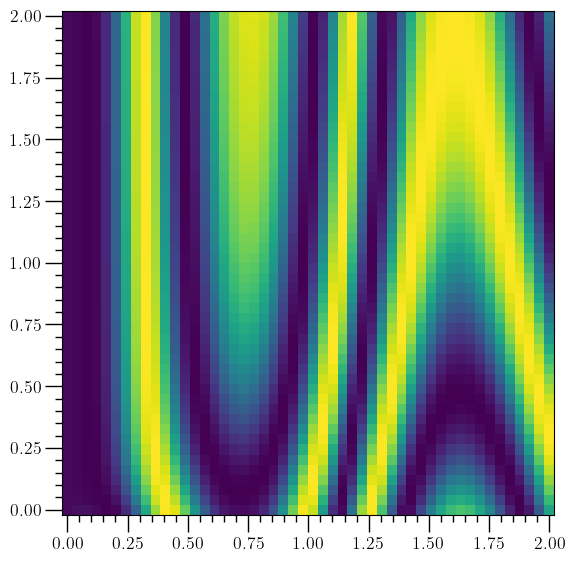

In [5]:
if plots:
    pl.canvas()
    pl.den_plot([t3d,"z"])
    pl.colbar=True
    #pl.xtitle('radius (km)')
    #pl.ytitle('gravitational mass (Msun)')
    plot.show()

Collect function values scattered across this plane:

In [6]:
import random
N=300
x2=numpy.zeros((N,2))
y2=numpy.zeros((N,1))
for i in range(0,N):
    x2[i,0]=random.random()*2.0
    x2[i,1]=random.random()*2.0
    y2[i,0]=t3d.interp(x2[i,0],x2[i,1],"z")

In [7]:
im=o2sclpy.interpm_sklearn_gp()
im.set_data_str(x2,y2,'test_size=0.1')

String: test_size=0.1 Dictionary: {'test_size': 0.1}
score: 0.9215892820497239


In [8]:
t3d.new_slice("gp")
for i in range(0,t3d.get_nx()):
    for j in range(0,t3d.get_ny()):
        x=t3d.get_grid_x(i)
        y=t3d.get_grid_y(j)
        t3d.set(i,j,"gp",im.eval(numpy.array([x,y])))

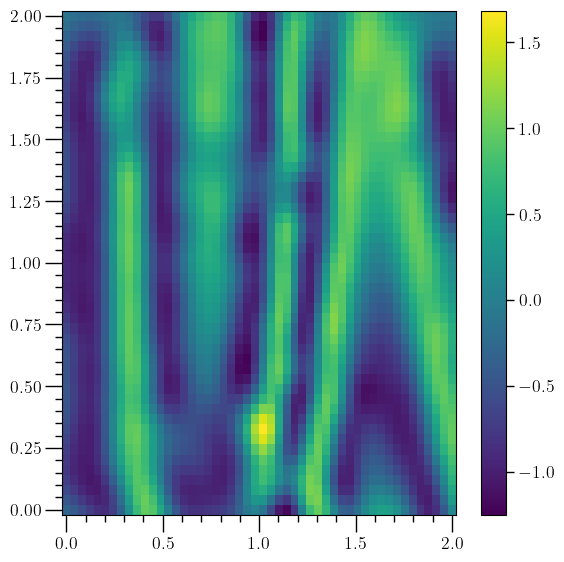

In [9]:
if plots:
    pl.canvas()
    pl.den_plot([t3d,"gp"])
    pl.colbar=True
    plot.show()

In [10]:
%%capture out1
im2=o2sclpy.interpm_tf_dnn()
im2.set_data(x2,y2,verbose=1,epochs=1000,
            test_size=0.0,batch_size=8,transform='none',
            activations=['relu','relu','relu','relu'],
            hlayers=[128,128,128,16])

2024-03-21 19:29:24.708537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
lines1=out1.stdout.split('\n')
for line in lines1[-5:]:
    print(line)

Epoch 999/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0054
Epoch 1000/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 



In [12]:
from IPython.utils import io

if t3d.is_slice("nn")[0]==False:
    t3d.new_slice("nn")
t3d.set_slice_all("nn",0.0)
for i in range(0,t3d.get_nx()):
    for j in range(0,t3d.get_ny()):
        x=t3d.get_grid_x(i)
        y=t3d.get_grid_y(j)
        with io.capture_output() as captured:
            t3d.set(i,j,"nn",im2.eval(numpy.array([x,y])));
    if i%2==1:
        print('i:',i+1,'/',t3d.get_nx())

i: 1 / 50
i: 2 / 50
i: 3 / 50
i: 4 / 50
i: 5 / 50
i: 6 / 50
i: 7 / 50
i: 8 / 50
i: 9 / 50
i: 10 / 50
i: 11 / 50
i: 12 / 50
i: 13 / 50
i: 14 / 50
i: 15 / 50
i: 16 / 50
i: 17 / 50
i: 18 / 50
i: 19 / 50
i: 20 / 50
i: 21 / 50
i: 22 / 50
i: 23 / 50
i: 24 / 50
i: 25 / 50
i: 26 / 50
i: 27 / 50
i: 28 / 50
i: 29 / 50
i: 30 / 50
i: 31 / 50
i: 32 / 50
i: 33 / 50
i: 34 / 50
i: 35 / 50
i: 36 / 50
i: 37 / 50
i: 38 / 50
i: 39 / 50
i: 40 / 50
i: 41 / 50
i: 42 / 50
i: 43 / 50
i: 44 / 50
i: 45 / 50
i: 46 / 50
i: 47 / 50
i: 48 / 50
i: 49 / 50
i: 50 / 50


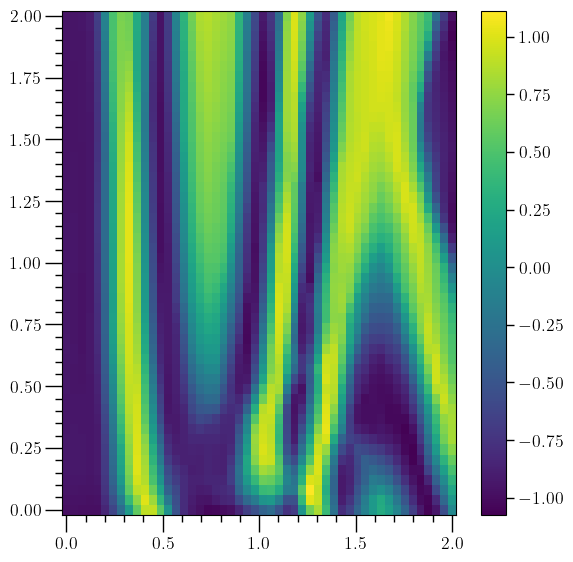

In [13]:
if plots:
    pl.canvas()
    pl.den_plot([t3d,"nn"])
    pl.colbar=True
    plot.show()